In [2]:
%cd C:\Users\inesl\Documents\Thesis\Code\Overcooked\overcooked-gym
import pandas as df
import numpy as np
from get_stats import *
from plots import *
from scipy.stats import mannwhitneyu, shapiro

C:\Users\inesl\Documents\Thesis\Code\Overcooked\overcooked-gym


In [3]:
#Effect Size r less than 0.3 -> small effect
#Effect Size r between 0.3 and 0.5 -> medium effect
#Effect Size r greater than 0.5 -> large effect

from math import sqrt
def mann_whitney_effect(x, y, U):
    n1 = x.shape[-1]
    n2 = y.shape[-1]
    mu = n1*n2/2
    std = sqrt(n1*n2*(n1+n2+1)/12)
    z = (U-mu)/std
    return abs(z/sqrt(n1+n2))

First, import the data:

In [4]:
dpp = []
pp = []
sa = []
for r in range(1,11):
    dpp_r = get_distilled_pp_episode_rewards(r)
    pp_r = get_pp_episode_rewards(r)
    sa_r = get_sa_episode_rewards(r)
    dpp.append(dpp_r)
    pp.append(pp_r)
    sa.append(sa_r)
dpp = pd.concat(dpp, ignore_index=True)
pp = pd.concat(pp, ignore_index=True)
sa = pd.concat(sa, ignore_index=True)

dpp_vals = dpp.iloc[:,-1].values
pp_vals = pp.iloc[:,-1].values
sa_vals = sa.iloc[:,-1].values

Then, compute some basic statistics:

In [5]:
print(f"DPP - average: {np.average(dpp_vals)}; std: {np.std(dpp_vals)}")
print(f"PP - average: {np.average(pp_vals)}; std: {np.std(pp_vals)}")
print(f"SA - average: {np.average(sa_vals)}; std: {np.std(sa_vals)}")

DPP - average: 9.859; std: 6.109756050776496
PP - average: 10.07; std: 5.95777643085069
SA - average: 10.896; std: 5.972703240577084


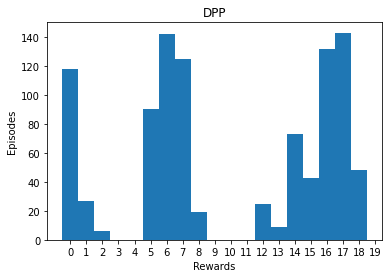

In [6]:
plot_histogram("DPP", dpp_vals)

In [7]:
shapiro(dpp_vals)[1] #p-value of the shapiro test (tests normality of a distribution)

9.828776433711237e-28

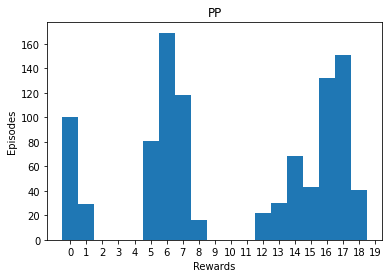

In [8]:
plot_histogram("PP", pp_vals)

In [9]:
shapiro(pp_vals)[1] #p-value of the shapiro test (tests normality of a distribution)

9.99810323145679e-28

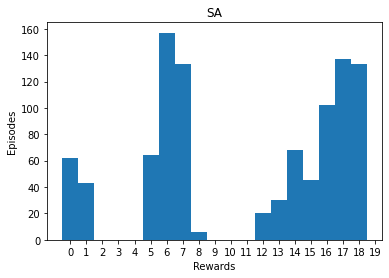

In [10]:
plot_histogram("SA", sa_vals)

In [11]:
shapiro(sa_vals)[1] #p-value of the shapiro test (tests normality of a distribution)

2.3917659348746e-28

As can be seen, neither of this distributions shows normal behaviour. As such the Mann-Whitney test is used to compare them.

# Hypothesis Testing

***H0:*** DPP and PP have identical distributions

***H1:*** DPP and PP do not have identical distributions

In [28]:
print(f"Mann-Whitney U test = {mannwhitneyu(dpp_vals, pp_vals)}")

Mann-Whitney U test = MannwhitneyuResult(statistic=492405.5, pvalue=0.5537858887465374)


The fact that the p-value is this big strongly indicates that we cannot reject the hypothesis that the two means are the same. 

***H0:*** SA and PP have identical distributions

***H1:*** SA and PP do not have identical distributions

In [29]:
U, pval = mannwhitneyu(pp_vals, sa_vals)
print(f"Mann-Whitney U test = {pval}")
print(f"Mann-Whitney effect = {mann_whitney_effect(pp_vals, sa_vals, U)}")

Mann-Whitney U test = 8.13334077705818e-05
Mann-Whitney effect = 0.08753934839825463


We can reject H0 at a significance level of $0.00008$, which seems to indicate that there is very likely a difference between using the PLASTIC algorithm and the specialized agents, which makes sense, since the PLASTIC agent does not have the knowledge of which teammate it is playing with so it will not be playing the most suited actions in the begining of the episode. However, the value of the effect test sugests that the magnitude of this difference is small, which indicates that the PLASTIC is able to achieve a good performance, comparable to the one of the specialized agents, even if it has to determine the teammates online.

***H0:*** SA and DPP have identical distributions

***H1:*** SA and DPP do not have identical distributions

In [30]:
U, pval = mannwhitneyu(dpp_vals, sa_vals)
print(f"Mann-Whitney U test = {pval}")
print(f"Mann-Whitney effect = {mann_whitney_effect(pp_vals, sa_vals, U)}")

Mann-Whitney U test = 8.835888055628064e-06
Mann-Whitney effect = 0.09875763533383956


Again, the p-value of this test strongly suggests that there is in fact a difference between the performances Distilled PLASTIC-Policy and the specialized agents, but the value of the effect test indicates that this difference is not very accentuated, that is, the effect of using Distilled PLASTIC-Policy instead of a specialized agent is small.

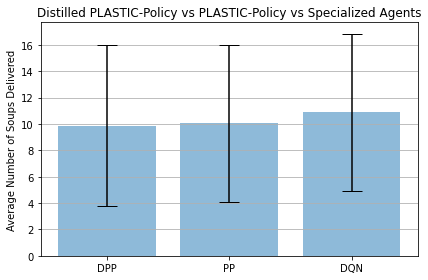

In [31]:
total_avgs = [np.average(dpp_vals), np.average(pp_vals), np.average(sa_vals)]
total_errors = [np.std(dpp_vals), np.std(pp_vals), np.std(sa_vals)]
bar_plots_comparing_a_pair_of_means(total_avgs, total_errors,["DPP", "PP", "DQN"], "Distilled PLASTIC-Policy vs PLASTIC-Policy vs Specialized Agents", save_file=None)

In [32]:
#DISTILLED PLASTIC-POLICY vs PLASTIC-POLICY for each teammate
dpp_avgs_by_teammate = []
pp_avgs_by_teammate = []
sa_avgs_by_teammate = []
dpp_stds_by_teammate = []
pp_stds_by_teammate = []
sa_stds_by_teammate = []

for t in range(5):
    dpp_t = dpp.loc[dpp['teammate_id'] == t]
    pp_t = pp.loc[pp['teammate_id'] == t]
    sa_t = sa.loc[sa['teammate_id'] == t]
    dpp_avg_t = np.average(dpp_t.iloc[:,-1].values)
    dpp_std_t = np.std(dpp_t.iloc[:,-1].values)    
    pp_avg_t = np.average(pp_t.iloc[:,-1].values)
    pp_std_t = np.std(pp_t.iloc[:,-1].values)
    sa_avg_t = np.average(sa_t.iloc[:,-1].values)
    sa_std_t = np.std(sa_t.iloc[:,-1].values)
    
    dpp_avgs_by_teammate.append(dpp_avg_t)
    pp_avgs_by_teammate.append(pp_avg_t)
    sa_avgs_by_teammate.append(sa_avg_t)
    
    dpp_stds_by_teammate.append(dpp_std_t)
    pp_stds_by_teammate.append(pp_std_t)
    sa_stds_by_teammate.append(sa_std_t)
    
    print(f"TEAMMATE {t}")
    print(f"  DPP - average: {dpp_avg_t}; std: {dpp_std_t}, shapiro test: {shapiro(dpp_t)[1]}")
    print(f"  PP - average: {pp_avg_t}; std: {pp_std_t}, shapiro test: {shapiro(pp_t)[1]}")
    print(f"  SA - average: {sa_avg_t}; std: {sa_std_t}, shapiro test: {shapiro(sa_t)[1]}")
    print(f"  scipy Mann Whitney(pp vs dpp): {mannwhitneyu(dpp_t.iloc[:,-1].values, pp_t.iloc[:,-1].values)[1]}")

TEAMMATE 0
  DPP - average: 7.874371859296482; std: 7.14876357039025, shapiro test: 7.880558796697947e-31
  PP - average: 8.19718309859155; std: 6.941647566558381, shapiro test: 2.484155989770699e-31
  SA - average: 9.163461538461538; std: 6.884501234550017, shapiro test: 1.4030311247685831e-30
  scipy Mann Whitney(pp vs dpp): 0.6658688664831109
TEAMMATE 1
  DPP - average: 14.98974358974359; std: 3.7182705431006062, shapiro test: 5.263000796089152e-28
  PP - average: 15.698863636363637; std: 2.3147744008562703, shapiro test: 2.1916187594888593e-26
  SA - average: 15.83; std: 2.9616042949725743, shapiro test: 1.317180322376617e-28
  scipy Mann Whitney(pp vs dpp): 0.21477897977323024
TEAMMATE 2
  DPP - average: 15.910994764397905; std: 3.6606631955680107, shapiro test: 2.88867271241352e-28
  PP - average: 16.604166666666668; std: 0.901147031411757, shapiro test: 2.9228822837919414e-28
  SA - average: 16.742990654205606; std: 2.222300405744146, shapiro test: 1.8969610616055714e-30
  scipy

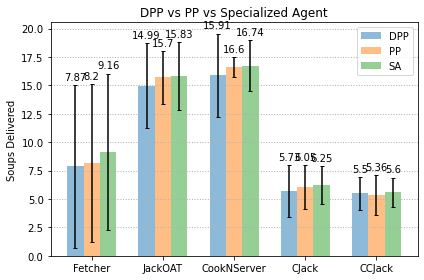

In [33]:
compare_multiple_trios_of_means(dpp_avgs_by_teammate, dpp_stds_by_teammate, "DPP",
                                pp_avgs_by_teammate, pp_stds_by_teammate, "PP",
                                sa_avgs_by_teammate, sa_stds_by_teammate, "SA",
                                ["Fetcher", "JackOAT","CookNServer","CJack","CCJack"], 
                                "DPP vs PP vs Specialized Agent", save_file=None)

In [34]:
def compare_multiple_trios_of_means(means_1, stds_1, name_1,
                                    means_2, stds_2, name_2,
                                    means_3, stds_3, name_3,
                                    labels, title, save_file=None,
                                    figsize=None):
    means_1 = [round(val, 2) for val in means_1]
    means_2 = [round(val, 2) for val in means_2]
    means_3 = [round(val, 2) for val in means_3]
    x = np.arange(len(labels))  # the label locations
    width = 0.23  # the width of the bars

    fig, ax = plt.subplots(figsize=figsize)
    rects1 = ax.bar(x - width, means_1, width, yerr=stds_1, label=name_1, alpha=0.5, ecolor='black', capsize=2)
    rects2 = ax.bar(x, means_2, width, yerr=stds_2, label=name_2, alpha=0.5, ecolor='black', capsize=2)
    rects3 = ax.bar(x + width, means_3, width, yerr=stds_3, label=name_3, alpha=0.5, ecolor='black', capsize=2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Soups Delivered')
    ax.set_title(title)
    ax.yaxis.grid(True, linestyle=':', linewidth=1)
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.bar_label(rects3, padding=3)

    fig.tight_layout()
    
    if save_file is not None:
        plt.savefig(save_file)
    plt.show()


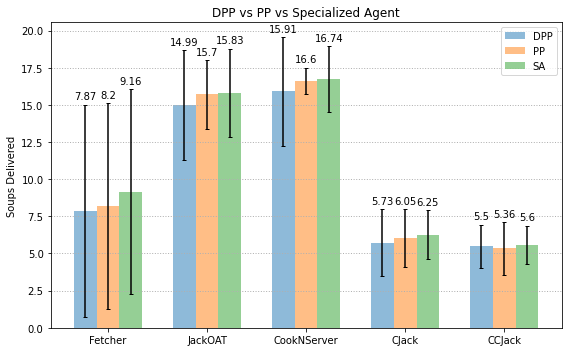

In [35]:
compare_multiple_trios_of_means(dpp_avgs_by_teammate, dpp_stds_by_teammate, "DPP",
                                pp_avgs_by_teammate, pp_stds_by_teammate, "PP",
                                sa_avgs_by_teammate, sa_stds_by_teammate, "SA",
                                ["Fetcher", "JackOAT","CookNServer","CJack","CCJack"], 
                                "DPP vs PP vs Specialized Agent", figsize=(8,5))

In [44]:
#DISTILLED PLASTIC-POLICY vs Specialized Agenst for each teammate
dpp_avgs_by_teammate = []
pp_avgs_by_teammate = []
sa_avgs_by_teammate = []
dpp_stds_by_teammate = []
pp_stds_by_teammate = []
sa_stds_by_teammate = []
teammates_names = ["Fetcher", "JackOAT", "CookNServer", "CJack", "CCJack"]
print("Teammate & p-value")

for t in range(5):
    dpp_t = dpp.loc[dpp['teammate_id'] == t]
    pp_t = pp.loc[pp['teammate_id'] == t]
    sa_t = sa.loc[sa['teammate_id'] == t]
    dpp_avg_t = np.average(dpp_t.iloc[:,-1].values)
    dpp_std_t = np.std(dpp_t.iloc[:,-1].values)    
    pp_avg_t = np.average(pp_t.iloc[:,-1].values)
    pp_std_t = np.std(pp_t.iloc[:,-1].values)
    sa_avg_t = np.average(sa_t.iloc[:,-1].values)
    sa_std_t = np.std(sa_t.iloc[:,-1].values)
    
    dpp_avgs_by_teammate.append(dpp_avg_t)
    pp_avgs_by_teammate.append(pp_avg_t)
    sa_avgs_by_teammate.append(sa_avg_t)
    
    dpp_stds_by_teammate.append(dpp_std_t)
    pp_stds_by_teammate.append(pp_std_t)
    sa_stds_by_teammate.append(sa_std_t)
    
    p_val_dpp_vs_sa = mannwhitneyu(dpp_t.iloc[:,-1].values, sa_t.iloc[:,-1].values)[1]
    print(f"{teammates_names[t]} & {round(p_val_dpp_vs_sa,3)}\\\\") 


Teammate & p-value
Fetcher & 0.005\\
JackOAT & 0.0\\
CookNServer & 0.0\\
CJack & 0.166\\
CCJack & 0.254\\


In [46]:
#PLASTIC-POLICY vs Specialized agents for each teammate
dpp_avgs_by_teammate = []
pp_avgs_by_teammate = []
sa_avgs_by_teammate = []
dpp_stds_by_teammate = []
pp_stds_by_teammate = []
sa_stds_by_teammate = []
teammates_names = ["Fetcher", "JackOAT", "CookNServer", "CJack", "CCJack"]
print("Teammate & p-value")

for t in range(5):
    dpp_t = dpp.loc[dpp['teammate_id'] == t]
    pp_t = pp.loc[pp['teammate_id'] == t]
    sa_t = sa.loc[sa['teammate_id'] == t]
    dpp_avg_t = np.average(dpp_t.iloc[:,-1].values)
    dpp_std_t = np.std(dpp_t.iloc[:,-1].values)    
    pp_avg_t = np.average(pp_t.iloc[:,-1].values)
    pp_std_t = np.std(pp_t.iloc[:,-1].values)
    sa_avg_t = np.average(sa_t.iloc[:,-1].values)
    sa_std_t = np.std(sa_t.iloc[:,-1].values)
    
    dpp_avgs_by_teammate.append(dpp_avg_t)
    pp_avgs_by_teammate.append(pp_avg_t)
    sa_avgs_by_teammate.append(sa_avg_t)
    
    dpp_stds_by_teammate.append(dpp_std_t)
    pp_stds_by_teammate.append(pp_std_t)
    sa_stds_by_teammate.append(sa_std_t)
    
    U, p_val_pp_vs_sa = mannwhitneyu(pp_t.iloc[:,-1].values, sa_t.iloc[:,-1].values)
    effect = mann_whitney_effect(pp_t.iloc[:,-1].values, sa_t.iloc[:,-1].values, U)
    
    print(f"{teammates_names[t]} & {round(p_val_pp_vs_sa, 3)} & {round(effect, 3)}\\\\")

Teammate & p-value
Fetcher & 0.01 & 0.123\\
JackOAT & 0.005 & 0.142\\
CookNServer & 0.0 & 0.188\\
CJack & 0.447 & 0.034\\
CCJack & 0.492 & 0.03\\


In [41]:
#DISTILLED PLASTIC-POLICY vs PLASTIC-POLICY
dpp_avgs_by_teammate = []
pp_avgs_by_teammate = []
sa_avgs_by_teammate = []
dpp_stds_by_teammate = []
pp_stds_by_teammate = []
sa_stds_by_teammate = []
teammates_names = ["Fetcher", "JackOAT", "CookNServer", "CJack", "CCJack"]
print("Teammate & p-value")

for t in range(5):
    dpp_t = dpp.loc[dpp['teammate_id'] == t]
    pp_t = pp.loc[pp['teammate_id'] == t]
    sa_t = sa.loc[sa['teammate_id'] == t]
    dpp_avg_t = np.average(dpp_t.iloc[:,-1].values)
    dpp_std_t = np.std(dpp_t.iloc[:,-1].values)    
    pp_avg_t = np.average(pp_t.iloc[:,-1].values)
    pp_std_t = np.std(pp_t.iloc[:,-1].values)
    sa_avg_t = np.average(sa_t.iloc[:,-1].values)
    sa_std_t = np.std(sa_t.iloc[:,-1].values)
    
    dpp_avgs_by_teammate.append(dpp_avg_t)
    pp_avgs_by_teammate.append(pp_avg_t)
    sa_avgs_by_teammate.append(sa_avg_t)
    
    dpp_stds_by_teammate.append(dpp_std_t)
    pp_stds_by_teammate.append(pp_std_t)
    sa_stds_by_teammate.append(sa_std_t)
    
    p_val_dpp_vs_pp = mannwhitneyu(dpp_t.iloc[:,-1].values, pp_t.iloc[:,-1].values)[1]
    mann_whitney_effect(x, y, U)
    print(f"{teammates_names[t]} & {round(p_val_dpp_vs_pp, 3)}\\\\") 


Teammate & p-value
Fetcher & 0.666\\
JackOAT & 0.215\\
CookNServer & 0.941\\
CJack & 0.53\\
CCJack & 0.65\\
